<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Visión por Computadora</center></span>
## <span style="color:red"><center>Reconocimiento de rostros con OpenCV</center></span>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



## <span style="color:blue">Introducción</span>


Directamente usando el paquete OpenCV, podemos aprovechar una serie de modelos pre entrenados. Vamos a ver la teoría detrás de estos modelos y cómo aplicarlos en contextos usuales.

## <span style="color:blue">Cascada de Haar</span>


Antes pensemos cómo podríamos teorizar un sistema de reconocimiento de rostros.

podríamos, por ejemplo, Definir una ventana que se vaya moviendo a través de la foto y que nos diga el sector donde hay imagen o no. Puede lograrlo dándole un "rostro estándar" y que haga comparaciones


<figure>
<center>
<img src="../Imagenes/sliding_window.gif" width="400" height="600" align="center"/> 
</center>
</figure>

problemas que encontramos con este acercamiento:

- Los humanos somos todos diferentes. Cosas como color de piel, forma del craneo, tamaños variantes, entre otros, causarán problemas en la detección
- diferentes tamaños de las imágenes pueden causar problemas con el procesamiento
- La sensibilidad de diferencias con respecto a las expresiones.

Qué es lo más importante a la hora de crear modelos de clasificación o detección? Generalización



<figure>
<center>
<img src="../Imagenes/cifar.png" width="800" height="300" align="center"/> 
</center>
</figure>

En la forma más elemental de estas tareas, no nos importan los detalles, solo nos importa la respuesta final: ¿Qué es?

Por esto necesitamos obtener las características "generales" de los objetos que estamos buscando. Así que la misión en la detección de rostros es encontrar dichas características clave que el computador pueda comprender

[Paul Viola y Michael Jones en 2001 ](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf)propusieron el uso de Aprendizaje automático para detección de rostros. Dentro de este paper pensaron en varios conceptos que puestos juntos formaban uno de los métodos de detección más poderosos

### <span style="color:blue">Características de Haar</span>


¿Qué caracteriza una cara? ¿Ojos? ¿Labios? ¿Nariz? La respuesta puede variar.

<figure>
<center>
<img src="../Imagenes/socket-shocked.jpg" width="600" height="400" align="center"/> 
</center>
</figure>

Sea la que sean las características más relevantes de un rostro, hay que buscar formas de extraerlas para decir en dónde encontramos rostros. Una forma de identificar características es a partir de los colores, o más específicamente, la intensidad.

Aquí entran las "Características de Haar". Funciones representadas en formas cuadráticas cuya función es encontrar las secciones de la imagen donde haya mayor intensidad de pixeles (tonos más oscuros)

<figure>
<center>
<img src="../Imagenes/haar_features.png" width="800" height="400" align="center"/> 
</center>
</figure>


tenemos tres tipos de características de Haar:

- doble rectángulo: Usado para detectar bordes
- triple rectángulo: Usado para detectar lineas
- cuádruple rectángulo: Todo lo demás

Cada una de estos rectángulos tienen partes color blanco y color negro. Esto es con la intención de comparar en qué partes de la imagen hay sectores más oscuros que en otros. 

Estos cuadros se aplican alrededor de toda la imagen (parecido al proceso de convolución) y se obtiene la suma de los pixeles dentro de cada sub cuadro y se resta lo obtenido en la sección negra con la sección negra

<figure>
<center>
<img src="../Imagenes/haar_features3.png" width="200" height="400" align="center"/> 
</center>
</figure>

Entre más cerca esté la operación final del 1, con mayor seguridad decimos que tenemos una característica relevante en ese sector

<figure>
<center>
<img src="../Imagenes/haar_features2.png" width="600" height="400" align="center"/> 
</center>
</figure>

Este proceso puede implicar un costo de computación alto. Por eso necesitamos un medio para atravesar por la imagen de forma óptima.

### <span style="color:blue">Imágenes integrales</span>


Para no hacer la suma completa de todos los pixeles en el cuadro, se introdujo la idea de Imagenes integrales

<figure>
<center>
<img src="../Imagenes/integral_image.png" width="400" height="200" align="center"/> 
</center>
</figure>

Esta nueva matriz esta compuesta de las sumas de los valores de submatrices. Con esto obtenemos información de la composición de los pixeles de una sección de la imagen.

Entonces, ¿cómo aplicamos esta optimización de la información a la suma de características?

<figure>
<center>
<img src="../Imagenes/integral_image2.png" width="600" height="400" align="center"/> 
</center>
</figure>

En este ejemplo especfíco, para conocer la suma de la sección morada podemos: Hacer una suma específica de cuatro coordenadas de la imagen integral

\begin{align}
    (x_2, y_2)+(x_1, y_1)-(x_1, y_2)-(x_2, y_1)
\end{align}

Podemos hacer la operación para revisar 

```
imagen original:
3+2+5+4=14

imagen integral:
46+10-22-20=14
```
Tenemos el mismo valor.

Ahora, en este caso, el número de sumas es el mismo. Pero si aumentamos el tamaño del area, en la imagen original necesitaremos hacer sumas más grandes, mientras que en la imagen integral siempre tendremos que hacer únicamente 4 operaciones

### <span style="color:blue">Entrenamiento AdaBoosting</span>


Un método de entrenamiento en el aprendizaje automátizado basado en la idea de "clasificadores débiles": clasificadores que no son los mejores, pero al menos son superiores a una selección aleatoria. Se les asigna un peso a los modelos y se juntan los resultados para crear un "Clasificador fuerte" o el modelo final a usar

Se hacen de hecho varios entrenamientos sobre muestras aleatorias de los datos y se le asigna un peso a cada uno de los modelos con base en su precisión, con esto se puede, por ejemplo, hacer una decisión sobre la mejor base de datos a utilizar.

<figure>
<center>
<img src="../Imagenes/adaboost.png" width="820" height="400" align="center"/> 
</center>
</figure>

En nuestro caso, estas "muestras aleatorias" van a ser segmentos de la imagen, y los clasificadores débiles van a ser múltiples instancias de las características de Haar. Después de entrenar con una ventana de imagen, el modelo final decidirá si en ese segmento hay un rostro o no. Si no hay rostro, se sigue al siguiente segmento. Pero si se cree que hay imagen, se mostrará la mejor clasificación de características de Haar.

<figure>
<center>
<img src="../Imagenes/haar_final.gif" width="410" height="400" align="center"/> 
</center>
</figure>

Vamos a aplicar este conocimiento a código. Por suerte, OpenCV-contrib viene con varios modelos de Haar pre entrenados que podemos utilizar inmediatamente

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


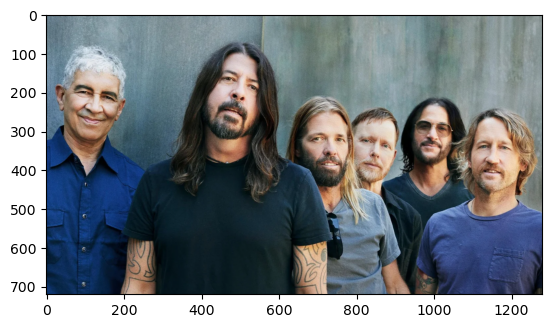

In [2]:
img = cv2.imread('../Imagenes/foo-fighters.png')

plt.imshow(img[:,:,::-1])
plt.show()

In [3]:
haarCascade = cv2.CascadeClassifier('../modelos/haarcascade_frontalface_default.xml')
print(haarCascade.empty())

False


para aplicar la detección usamos la función `detectMultiScale` que tiene dos parámetros opcionales pero que son importantes:

- `scaleFactor`: Qué tanto se va a re escalar la imagen durante las iteraciones. Esto permite detectar rostros de distinto tamaño.
- `minNeighbors`: Número de "vecinos" o detecciones cercanas para confirmar la detección

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
detectedFaces = haarCascade.detectMultiScale(gray_img, 1.3, 1) #

Vamos ahora a dibujar cuadros en los rostros que encontró

In [5]:
img_copy = img.copy()
for face in detectedFaces:
    x, y, w, h = face
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 0, 255), 3)

In [6]:
cv2.imshow("Rostros detectados", img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

¿Qué problemas encontramos? y ¿cómo lo arreglamos? cambiando un poco los hiper parámetros

Podemos también, no solo detectar rostros enteros, pero partes específicas

In [7]:
f_cascade = cv2.CascadeClassifier('../modelos/haarcascade_frontalface_default.xml')
e_cascade = cv2.CascadeClassifier('../modelos/haarcascade_eye.xml')
img_copy2 = img.copy()
gray = cv2.cvtColor(img_copy2, cv2.COLOR_BGR2GRAY)
faces = f_cascade.detectMultiScale(gray, 1.3, 2)
for (x,y,w,h) in faces:
    img_rect = cv2.rectangle(img_copy2,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img_rect[y:y+h, x:x+w]
    eyes = e_cascade.detectMultiScale(roi_gray, 1.2, 2)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img_copy2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Vamos a hacer un pequeño cambio a la imagen y ver qué sucede

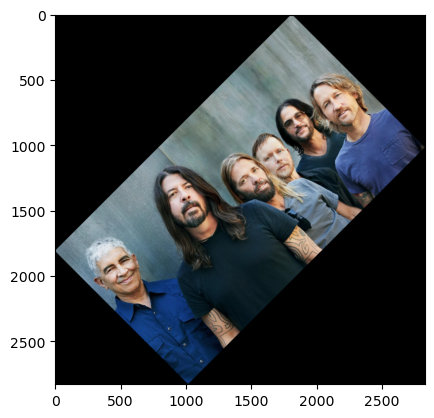

In [8]:
height, width = gray_img.shape

theta = 45

center = (width//2, height//2)
scale = 2

M = cv2.getRotationMatrix2D(center, theta, scale)

abs_cos = abs(M[0,0])
abs_sin = abs(M[0,1])

new_width = int(height * abs_sin + width * abs_cos)
new_height = int(height * abs_cos + width * abs_sin)



M[0, 2] += new_width//2 - center[0]
M[1, 2] += new_height//2 - center[1]

img_rotate = cv2.warpAffine(img, M, (new_width, new_height))

plt.imshow(img_rotate[:,:,::-1])
plt.show()


In [9]:
detectedFaces = haarCascade.detectMultiScale(gray_img, 1.3, 1) 

img_rot_copy = img_rotate.copy()
for face in detectedFaces:
    x, y, w, h = face
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 0, 255), 3)

img_rot_copy = cv2.resize(img_rot_copy, (960, 960))  
cv2.imshow("Rostros detectados", img_rot_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

¿Por qué no funciona? Porque el modelo usado es unicamente para detectar rostros de manera FRONTAL

Por último, podemos trabajar tanto con la cámara como con video en la detección

In [10]:
cap = cv2.VideoCapture(0)

while True:
    ret, frames = cap.read()
    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)
    faces = f_cascade.detectMultiScale(gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)
    for (x, y, w, h) in faces:
        cv2.rectangle(frames, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imshow('Video', frames)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()